(array([ 3., 22., 33., 20., 13.,  3.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 1 Patch objects>)

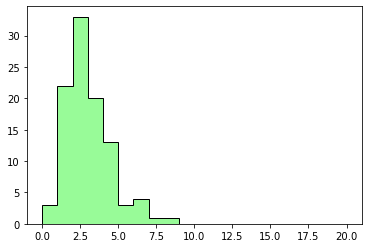

In [40]:
import math
import numpy as np
from scipy. stats import lognorm
from scipy.stats import shapiro 
from scipy.stats import kstest
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

#make this example reproducible
np.random.seed (1)
#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset_1 = lognorm.rvs (s=0.5, loc = 0, scale=math.exp(1), size=100)
#create histogram to visualize values in dataset
plt.hist(lognorm_dataset_1, edgecolor='black', bins=20, range = (0,20), histtype = "stepfilled", color = "palegreen") 

(array([ 0.,  0.,  0.,  5., 11., 13., 20., 19., 14.,  6.,  6.,  0.,  1.,
         2.,  0.,  2.,  0.,  1.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 1 Patch objects>)

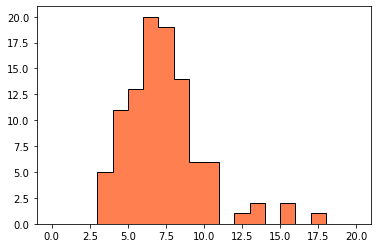

In [41]:
#generate shifted dataset that contains 1000 log-normal distributed values
lognorm_dataset_2 = lognorm.rvs (s=.5, loc = 2, scale=math.exp(1.5), size=100)
#create histogram to visualize values in dataset
plt.hist(lognorm_dataset_2, edgecolor='black', bins=20, range = (0,20), histtype = "stepfilled", color = 'coral')

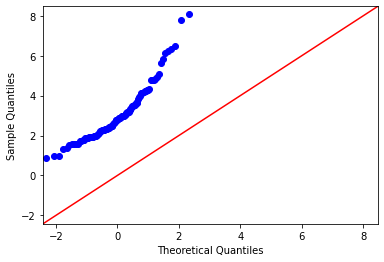

In [42]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot (lognorm_dataset_1, line='45')

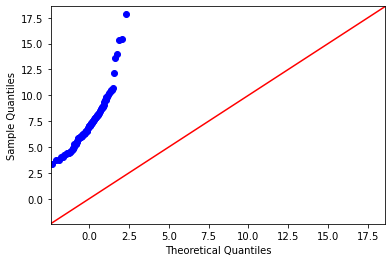

In [43]:
fig = sm.qqplot (lognorm_dataset_2, line='45')

In [44]:
shapiro(lognorm_dataset_1)

ShapiroResult(statistic=0.9099735021591187, pvalue=4.295816324884072e-06)

In [45]:
shapiro(lognorm_dataset_2)

ShapiroResult(statistic=0.897602915763855, pvalue=1.09253051050473e-06)

In [46]:
#perform Kolmogorov-Smirnov test for normality
kstest(lognorm_dataset_1, 'norm')

KstestResult(statistic=0.8876477687466565, pvalue=2.46732675865075e-95)

In [47]:
kstest(lognorm_dataset_2, 'norm')

KstestResult(statistic=0.9995603578012926, pvalue=0.0)

In [48]:
#log transform
dataset_1 = np.log(lognorm_dataset_1)
dataset_2 = np.log(lognorm_dataset_2)

(array([[ 3.,  0.,  2.,  4.,  5., 14., 15., 11., 14.,  8., 10.,  6.,  3.,
          3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  9.,  8., 13.,
         20., 21., 12.,  8.,  1.,  2.,  3.]]),
 array([-1.50769348e-01,  9.13399498e-04,  1.52596147e-01,  3.04278895e-01,
         4.55961643e-01,  6.07644391e-01,  7.59327139e-01,  9.11009887e-01,
         1.06269264e+00,  1.21437538e+00,  1.36605813e+00,  1.51774088e+00,
         1.66942363e+00,  1.82110637e+00,  1.97278912e+00,  2.12447187e+00,
         2.27615462e+00,  2.42783737e+00,  2.57952011e+00,  2.73120286e+00,
         2.88288561e+00]),
 <a list of 2 Lists of Patches objects>)

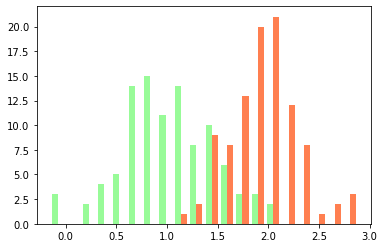

In [49]:
plt.hist([dataset_1,dataset_2], bins=20, color = ["palegreen", "coral"])

ShapiroResult(statistic=0.9920046329498291, pvalue=0.8215615153312683)

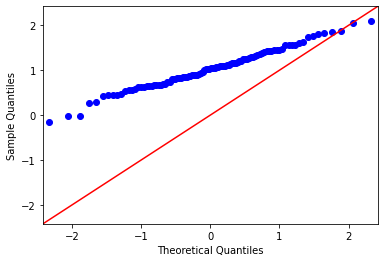

In [50]:
fig = sm.qqplot (dataset_1, line='45')
shapiro(dataset_1)

ShapiroResult(statistic=0.9867352247238159, pvalue=0.42006707191467285)

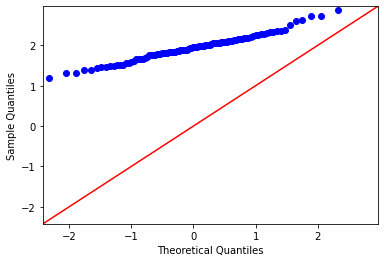

In [51]:
fig = sm.qqplot (dataset_2, line='45')
shapiro(dataset_2)

In [52]:
#perform one-way ANOVA
f_oneway(dataset_1, dataset_2)

F_onewayResult(statistic=275.57996609090503, pvalue=2.371375600763855e-39)